<a href="https://colab.research.google.com/github/ychoi-kr/LLM-API/blob/main/openai/openai_vision_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = api_key = userdata.get('OPENAI_API_KEY')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from openai import OpenAI

client = OpenAI()

In [5]:
image_path = "/content/drive/MyDrive/llm-api-prog/data/train_station.jpeg"

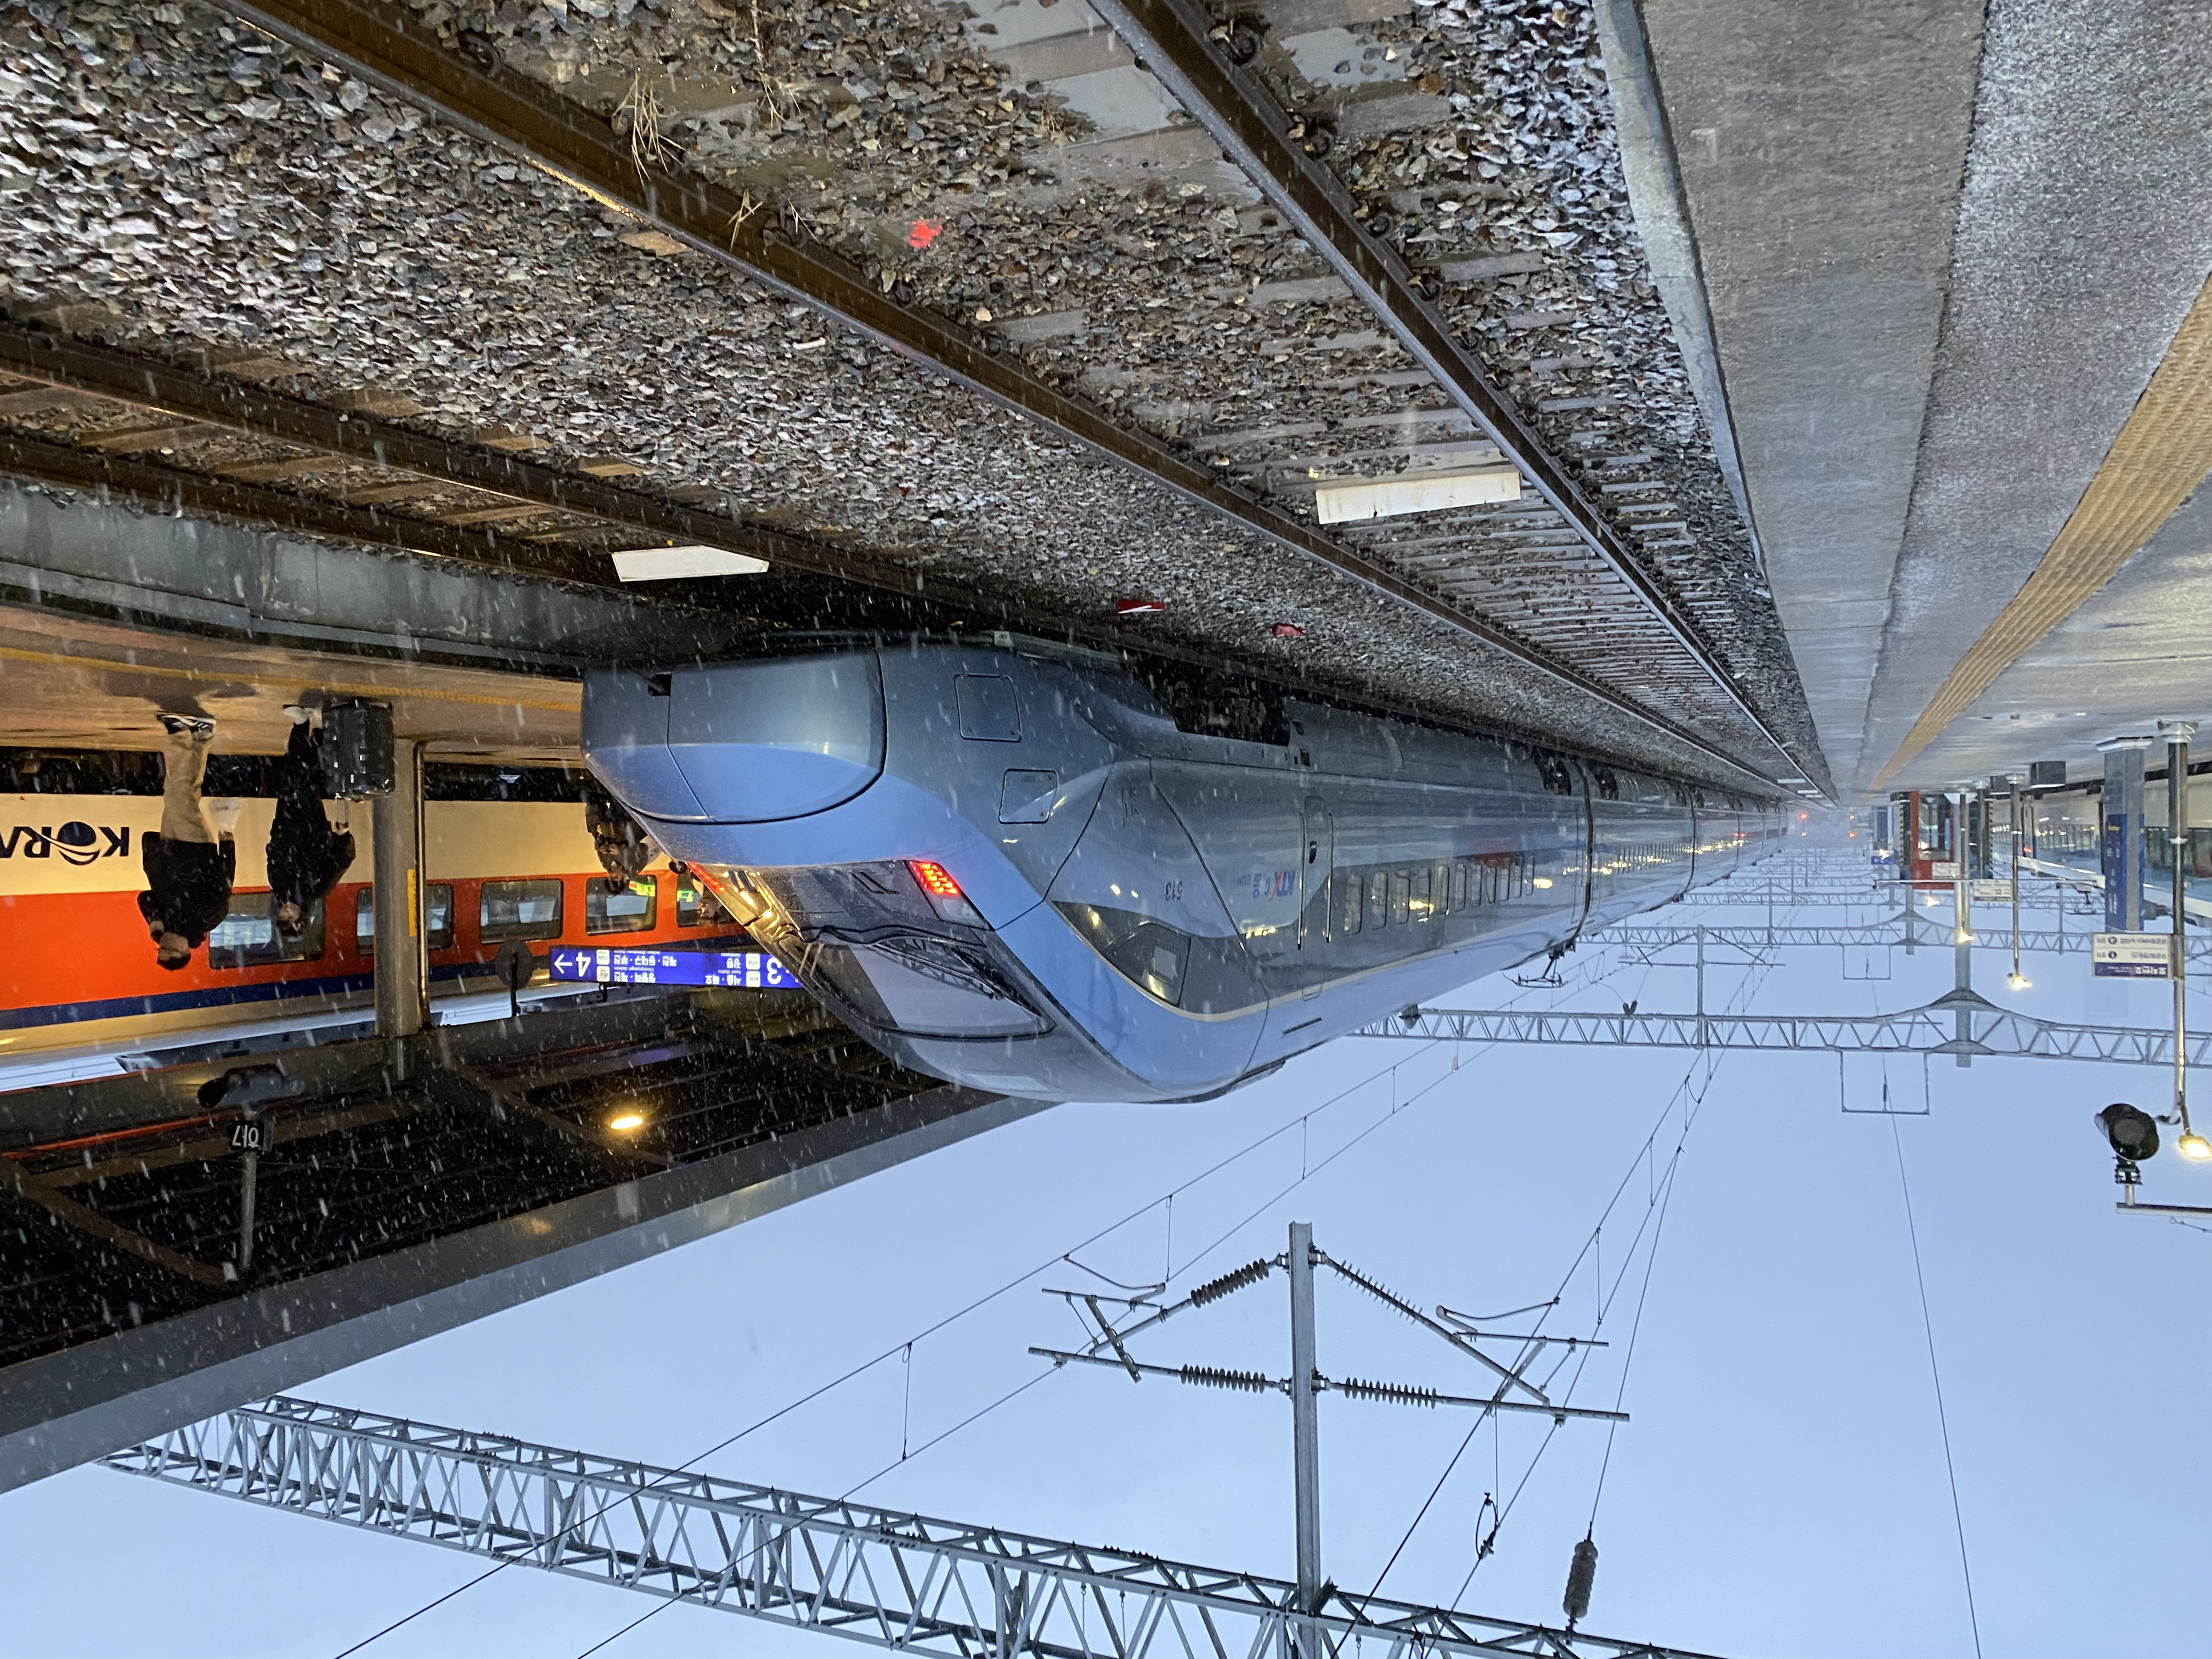

In [6]:
# 이미지를 노트북에 표시

from IPython.display import Image
Image(filename=image_path)


In [7]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(image_path)

In [9]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "사진에 무엇이 있나요?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ]
)

In [10]:
print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='사진에는 기차역에 정차한 고속 열차가 보입니다. 열차는 플랫폼에 서 있으며, 일부 승객들이 열차에 탑승하거나 하차하는 모습이 보입니다. 기차역의 표지판과 시계도 보입니다. 하늘에서는 눈이 내리는 것처럼 보입니다.', role='assistant', function_call=None, tool_calls=None))


In [12]:
print(response.choices[0].message.content)

사진에는 기차역에 정차한 고속 열차가 보입니다. 열차는 플랫폼에 서 있으며, 일부 승객들이 열차에 탑승하거나 하차하는 모습이 보입니다. 기차역의 표지판과 시계도 보입니다. 하늘에서는 눈이 내리는 것처럼 보입니다.


In [15]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "사진 속 열차의 모델이 무엇인가요?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ]
)

In [16]:
print(response.choices[0].message.content)

이 사진 속의 열차는 한국철도공사(KORAIL)의 KTX-이음 열차입니다. KTX-이음은 한국에서 운행되는 고속열차 중 하나로, KTX 산천의 후속 모델로 개발되었습니다. KTX-이음은 전기 동력분산식(EMU)으로 운영되며, 환경친화적이고 에너지 효율이 높은 것이 특징입니다.
